In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [54]:
#Load the MNIST dataset from keras.dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [55]:
type(X_train)

numpy.ndarray

In [56]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [57]:
#print the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [58]:
print(X_train[10].shape)

(28, 28)


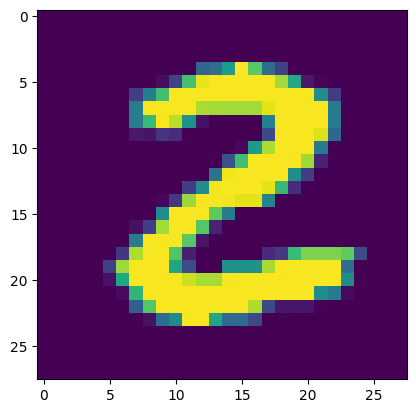

2


In [59]:
#display the image

plt.imshow(X_train[25])
plt.show()

#print the corresponding label from Y_train
print(Y_train[25])

In [60]:
#Image label analysis

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [61]:
#Scaling the values from 0-255 to 0-1 in order to reduce calculations

X_train = X_train/255
X_test = X_test/255

In [62]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a neural network

In [63]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [64]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2924 - accuracy: 0.9157
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1031 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0689 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0449 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.036

In [66]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9736
0.9735999703407288


In [67]:
print(X_test.shape)

(10000, 28, 28)


In [70]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [73]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix


In [74]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [75]:
print(conf_mat)

tf.Tensor(
[[ 962    1    3    2    1    4    1    4    1    1]
 [   0 1129    4    0    0    1    0    0    1    0]
 [   4    2 1000    3    6    1    2    7    6    1]
 [   0    0    4  987    0    8    0    6    2    3]
 [   1    0    0    1  962    0    5    4    1    8]
 [   2    0    0    7    2  871    3    1    4    2]
 [   1    2    1    1   12   10  925    2    4    0]
 [   0    6    9    1    0    0    0 1004    1    7]
 [   4    0    4   11    8   13    1    4  923    6]
 [   2    4    0    4   12    7    0    7    0  973]], shape=(10, 10), dtype=int32)


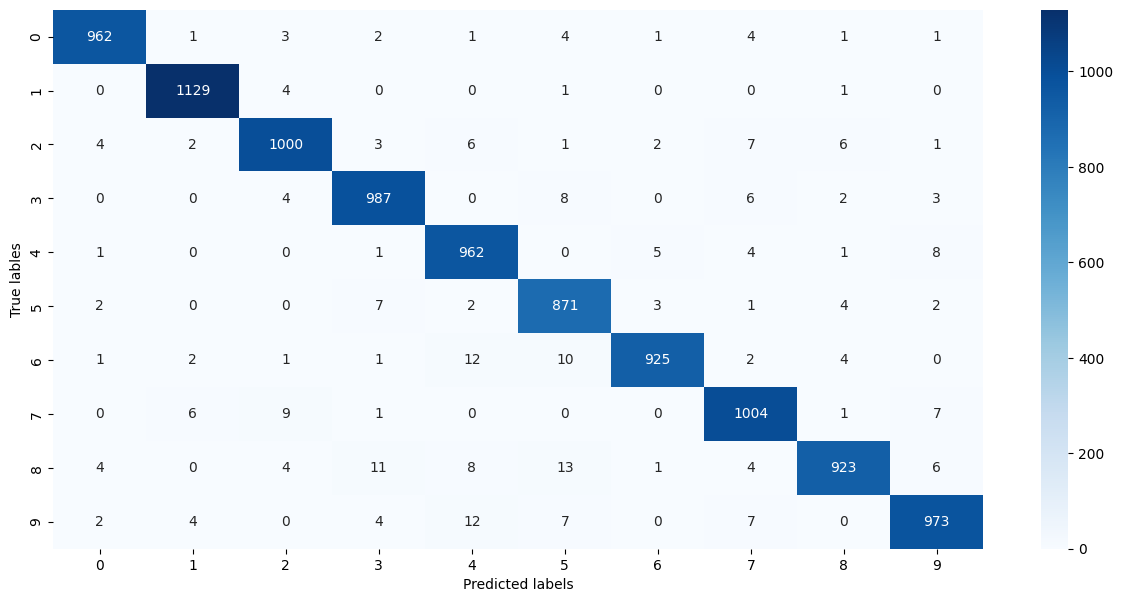

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')    #fmt = d means integer values
plt.ylabel('True lables')
plt.xlabel('Predicted labels')
plt.show()

Building a predictive model

In [77]:
input_image_path = '/content/MNIST_digit.png'

In [79]:
input_image = cv2.imread(input_image_path)

In [80]:
type(input_image)

numpy.ndarray

In [81]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


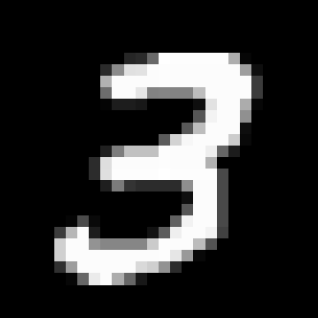

In [82]:
cv2_imshow(input_image)

In [83]:
input_image.shape

(318, 318, 3)

In [84]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [85]:
grayscale.shape

(318, 318)

In [86]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [87]:
input_image_resize.shape

(28, 28)

In [89]:
cv2_imshow(input_image_resize)

In [90]:
input_image_resize = input_image_resize/255

In [91]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [92]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 32ms/step
[[3.66417270e-12 1.12639595e-04 4.83840611e-03 1.00000000e+00
  1.61836045e-10 8.83141041e-01 8.23263395e-20 2.27205385e-03
  6.08079426e-05 9.62128818e-01]]


In [94]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
